In [1]:
from src.clean_data import get_cleaned_data

df = get_cleaned_data()
df

cleaning data...
removing 17 rows with price >= 150000...
removing 25 rows with invalid district...
final length: 397


,url,last_update,price,district,bag_of_words,neubau,area,rooms,needs_fix,leased
0,https://www.willhaben.at/iad/immobilien/d/eige...,2024-03-29 21:45:00,149900.0,1090,ehemalige hausbersorgerwohnung in u-bahn nähet...,False,30.04,1.0,True,None
1,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-03 13:57:00,129001.0,1100,tolle studentenwohnung- wohnen im herzen favor...,True,32.11,1.0,None,False
2,https://www.willhaben.at/iad/immobilien/d/eige...,2024-03-11 10:43:00,115000.0,1020,preiswerte zentrumsnahe altbaugarconniere mit ...,False,29.00,1.0,True,False
4,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-01 09:55:00,110000.0,1210,# sq -sanierungsbedürftige helle 1 zimmer woh...,False,31.31,1.0,False,None
5,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-01 07:04:00,112000.5,1160,leistbares wohnen - charmante altbauwohnung na...,False,28.08,1.0,False,False
...,...,...,...,...,...,...,...,...,...,...
433,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-05 09:25:00,104000.0,1100,sanierungsbedürftige wohnung im 3. og in zentr...,None,30.41,1.0,None,None
434,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-02 12:19:00,127000.0,1200,schicke kleine wohnung in hervorragender lagew...,False,NaN,1.0,None,False
436,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-04 13:56:00,129000.0,1110,perfekte starterwohnung in zentraler lage - 1 ...,True,NaN,1.0,False,False
437,https://www.willhaben.at/iad/immobilien/d/eige...,2024-03-12 09:37:00,149000.0,1090,ideales investment für anleger oder selbstnutz...,False,32.00,1.0,False,False


# choose best

In [15]:
import webbrowser

dfcpy = df.copy()

dfcpy = dfcpy[dfcpy['needs_fix'] != True]
dfcpy = dfcpy[dfcpy['leased'] != True]

bad_words = [
    "unbefristet",
    "vermietet",
    "untervermietet",
    "renovierungsbedürftig",
    "renovierungsbedürftigen",
    "sanierungsbedürftig",
    "sanierungsbedürftigen",
    "kaputt"
]
for word in bad_words:
    dfcpy = dfcpy[~dfcpy['bag_of_words'].str.contains(word, case=False)]


dfcpy = dfcpy[dfcpy['neubau'] == True]

dfcpy = dfcpy.sort_values(by='price', ascending=True)

print("num results:", len(dfcpy))

for url in dfcpy['url']:
    webbrowser.open(url)

num results: 18


# explore data

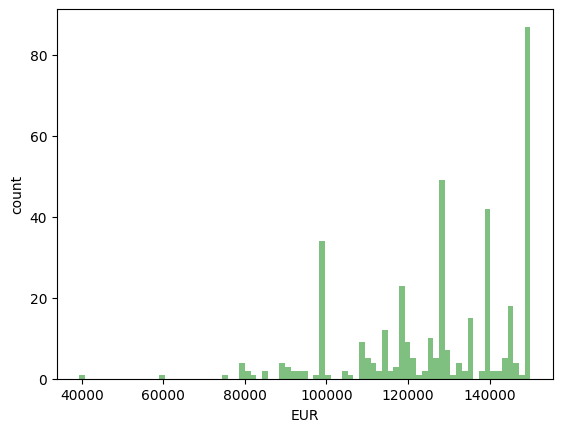

In [3]:
# price distribution

import matplotlib.pyplot as plt

plt.hist(df["price"], bins=len(df) // 5, color="green", alpha=0.5) 
plt.xlabel("EUR")
plt.ylabel("count")
plt.show()

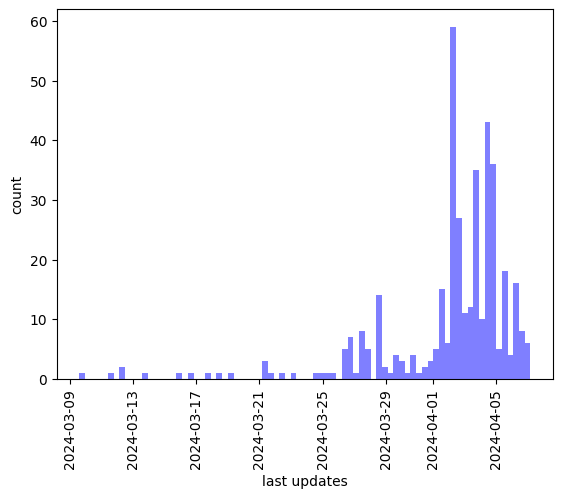

In [4]:
# update distribution

plt.hist(df["last_update"], bins=len(df) // 5, color="blue", alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel("count")
plt.xlabel("last updates")
plt.show()

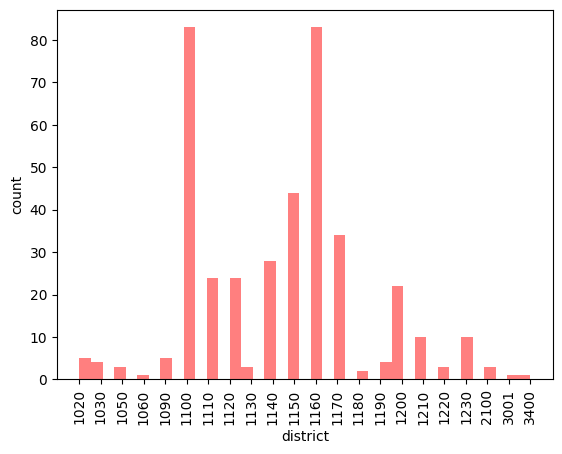

In [5]:
# district distribution

plt.hist(df.sort_values(by="district")["district"], bins=len(df) // 10, color="red", alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel("count")
plt.xlabel("district")
plt.show()

In [6]:
# needs_fix distribution

print(f"needs fix: {len(df[df['needs_fix'] == True]) / len(df) * 100:.2f}%")

needs fix: 24.94%


In [7]:
# room distribution

df_cpy = df.copy()
df_cpy["rooms"] = df_cpy["rooms"].apply(lambda x: x if x < 10 else 1)
print(df_cpy["rooms"].value_counts())

rooms
1.0    300
2.0     95
3.0      2
Name: count, dtype: int64
